# Exercise 2

In this exercise, we will perform classification on a simple dataset.

We can generate the dataset with:

In [ ]:
from sklearn.datasets import make_blobs

(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2,
cluster_std=3.5, random_state=1)

X and y are the features and the label, respectively. We can look at the format of the data:

In [ ]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

As you can see, X and y are numpy arrays. There are a total of 5000 samples in the dataset. X has 2 features per sample, and y are the corresponding classes.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="x", c=y)
plt.show()

We can see that the two clusters are not linearily separable, but a linear classification would still yield good results. Your tasks in this notebook are now:

- Add and adapt your regression code (using numpy, not sklearn) from the previous exercise, so that is can predict the class label for each sample. This means, we treat the class of a point (0 or 1) as the target value of the regression. The linear regression will then yield us a formula that can give each (x, y) location a score, which class it might belong to. It's not a probability because it does not need to be between 0 and 1, but we can interpret a value being nearer to 0 as a higher probability for the class 0, and a value being nearer to 1 as a higher probability for class 1.
- Perform a classification of the dataset using the regression formula. That means, assign the class 0 to data points that have a regression 'score' that is nearer to 0 than to 1, and assign the class 1 to the other points. Visualize the learned classification with matplotlib by coloring each (x, y) pair in the dataset with a color that depends on your classification (e.g. yellow for class 0, blue for class 1).
- Calculate the classification accurracy $ \left( \frac{n_{\text{correctly_classified}}}{(n_{\text{correctly_classified}} + n_{\text{incorrectly_classified}})} \right) $
- Bonus: If everything works, you will see that your classification splits the dataset at a specific line between the two clusters. Calculate the formula for this line and plot it as a line using matplotlib.
- After you have done the iris classification exercise, print out the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) using sklearn for this binary classification task. Then, plot the precision-recall curve using [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) and matplotlib
- Bonus: After you have done all the above, write your own code to calculate the metrics shown in classification_report and use that code to generate the precision-recall curve manually.

## Solution


Calculation of the seperation line
the point $x= \left(\begin{array}{c} x_1\\x_2\end{array}\right)$ 
has to satisfy the following equation
$$
\left(\begin{array}{c} w_1 & w_2\end{array}\right)*\left(\begin{array}{c} x_1\\x_2\end{array}\right)+b=0.5
$$
$$ 
x1*w1+x2*w2+b=0.5
$$
->
$$
x2 =((0.5-b)-w1*x1)/w2
$$

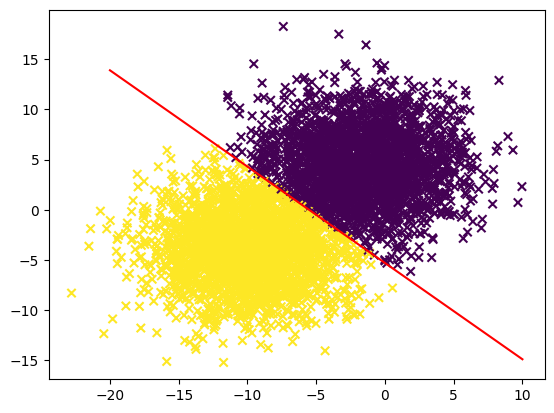

classification accurracy= 0.9586
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2500
           1       0.96      0.96      0.96      2500

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



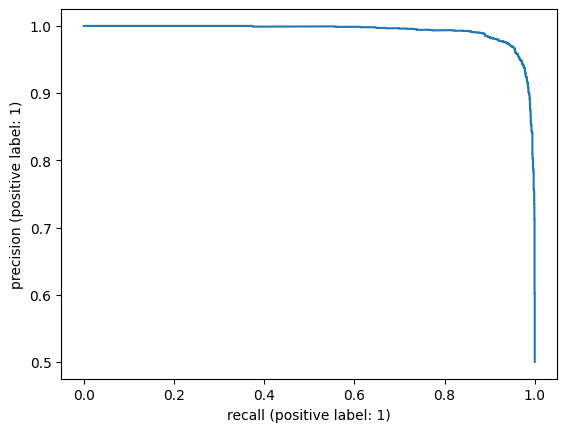

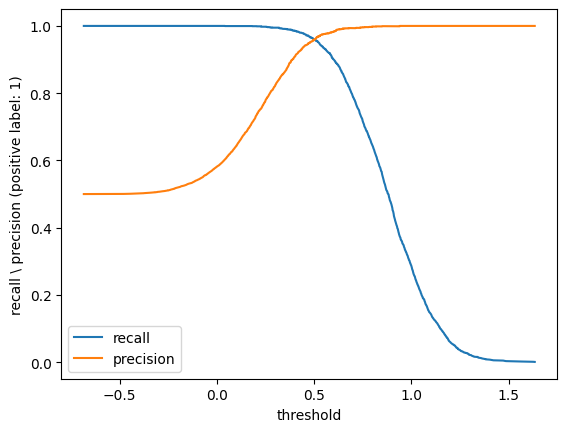

True
Precision 0:  0.958417 Recall 0:  0.9588 F1_1:  0.958608 N(0):  2500 

Precision 1:  0.958784 Recall 1:  0.9584 F1_1:  0.958592 N(1):  2500 

Acurracy:  0.9586 

Macro Avg: Precision:  0.9586 Recall:  0.9586 F1_1:  0.958608 N:  5000 

Weighted Avg: Precision:  0.9586 Recall:  0.9586 F1:  0.958608 N:  5000 

              precision    recall  f1-score   support

           0   0.958417  0.958800  0.958608      2500
           1   0.958784  0.958400  0.958592      2500

    accuracy                       0.958600      5000
   macro avg   0.958600  0.958600  0.958600      5000
weighted avg   0.958600  0.958600  0.958600      5000



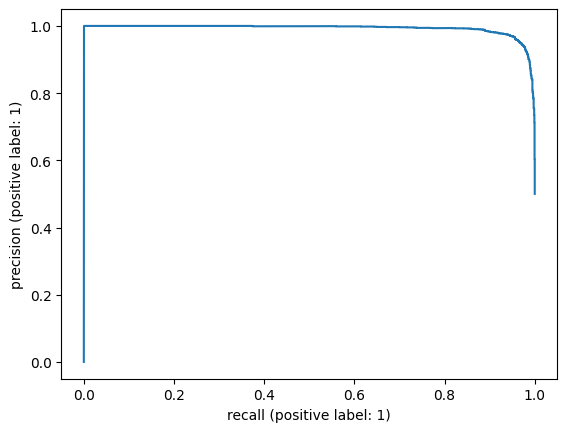

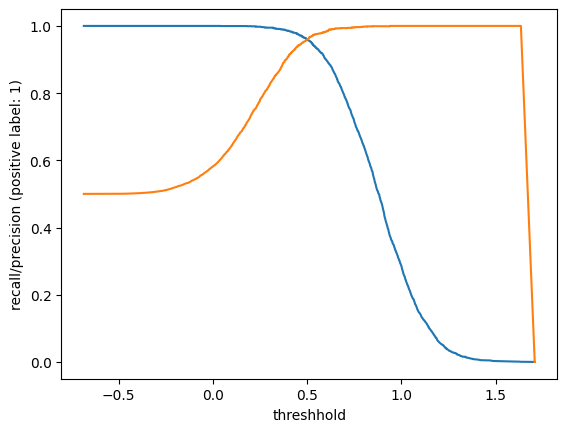

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, precision_recall_curve

(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2,
cluster_std=3.5, random_state=1)


ones = np.ones(X.shape[0]) 
X_ = np.c_[X, ones] 
weights = (np.linalg.pinv(X_.T @ X_) @ X_.T) @ y


def classify(X,w):
     score = X @ w
     y_pred= (score>0.5)
     return score,y_pred

(score,y_pred)=classify(X_,weights)
y_pred=y_pred.astype(int)
errors = ~(y_pred ==y)

#line splitting the clusters
x_1=[-20,10]
x_2=[0,0]
x_2[0]=(0.5-weights[2]-weights[0]*x_1[0])/weights[1]
x_2[1]=(0.5-weights[2]-weights[0]*x_1[1])/weights[1]
#shows calculated classification
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="x", c=y_pred)
plt.plot(x_1,x_2,c="red")
plt.show()

# #shows original labels
# plt.figure()
# plt.scatter(X[:, 0], X[:, 1], marker="x", c=y)
# plt.show()

# #shows calculated classification and misclassified Points
# plt.figure()
# plt.scatter(X[:, 0], X[:, 1], marker="x", c=y_pred)
# plt.scatter(X[errors, 0], X[errors, 1], marker="x", c="red")
# plt.show()

#classification accuracy
n_errors=sum(errors.astype(int))
n_total=len(y)
print("classification accurracy=",(n_total-n_errors)/n_total)

#classification report
print(classification_report(y,y_pred))

#Precision recall curve
(precision,recall,threshold)=precision_recall_curve(y,score)
plt.figure()
plt.plot(recall,precision,)
plt.xlabel("recall (positive label: 1)")
plt.ylabel('precision (positive label: 1)')
plt.show()

plt.figure()
plt.plot(threshold[0:4999],recall[0:4999])

plt.plot(threshold[0:4999],precision[0:4999])
plt.legend(["recall","precision"])
plt.ylabel("recall \ precision (positive label: 1)")
plt.xlabel('threshold')
plt.show()

#Own calculation of classification report
class custom_class_report:
     
     def __init__(self,N,TP,FP,FN):
          self.N=N
          self.TP=TP
          self.FP=FP
          self.FN=FN
          self.N_1=TP+FN
          self.N_0=N-TP-FN
          if(TP+FP>0):
               self.precision_1=TP/(FP+TP)
          else:
               self.precision_1=1
          if(TP+FN>0):
               self.recall_1=TP/(FN+TP)
          else:
               self.recall_1=1
          self.precision_0=(self.N_0-FP)/(N-(TP+FP))
          self.recall_0=(self.N_0-FP)/(N-(TP+FN))
          self.F1_1=2*self.precision_1*self.recall_1/(self.precision_1+self.recall_1)
          self.F1_0=2*self.precision_0*self.recall_0/(self.precision_0+self.recall_0)
          self.accuracy=(N-(FP+FN))/N
     def print(self):
          print("Precision 0: ",'{:.6}'.format(self.precision_0),"Recall 0: ",'{:.6}'.format(self.recall_0),"F1_1: ",'{:.6}'.format(self.F1_0),"N(0): ",self.N_1,"\n")
          print("Precision 1: ",'{:.6}'.format(self.precision_1),"Recall 1: ",'{:.6}'.format(self.recall_1),"F1_1: ",'{:.6}'.format(self.F1_1),"N(1): ",self.N_1,"\n")
          print("Acurracy: ", '{:.6}'.format(self.accuracy),"\n")
          print("Macro Avg:","Precision: ",'{:.6}'.format((self.precision_1+self.precision_0)/2),"Recall: ",'{:.6}'.format((self.recall_0+self.recall_1)/2),"F1_1: ",'{:.6}'.format((self.F1_0+self.F1_0)/2),"N: ",self.N,"\n")
          print("Weighted Avg:","Precision: ",'{:.6}'.format((self.N_0*self.precision_0+self.N_1*self.precision_1)/(self.N_0+self.N_1)),"Recall: ",'{:.6}'.format((self.N_0*self.recall_0+self.N_1*self.recall_1)/(self.N_0+self.N_1)),"F1: ",'{:.6}'.format((self.N_0*self.F1_0+self.N_1*self.F1_0)/(self.N_0+self.N_1)),"N: ",self.N,"\n")
def custom_classification_report(y,score,cutoff):

     y_pred=(score>cutoff).astype(int)
     TP_1 = 0
     FP_1 = 0
     FN_1 = 0
     TP_0 = 0
     FP_0 = 0
     FN_0 = 0

    # Determine whether each prediction is TP, FP, TN, or FN
     for i in range(0,len(y)): 
          if y[i]==y_pred[i]==1:
               TP_1 += 1
          if y_pred[i]==1 and y[i]!=y_pred[i]:
               FP_1 += 1
          if y_pred[i]==0 and y[i]!=y_pred[i]:
               FN_1 += 1
          if y[i]==y_pred[i]==0:
               TP_0 += 1
          if y_pred[i]==0 and y[i]!=y_pred[i]:
               FP_0 += 1
          if y_pred[i]==1 and y[i]!=y_pred[i]:
               FN_0 += 1
#test:
     test= FP_1==FN_0
     test=test and FP_0==FN_1
     test=test and TP_0==len(y)-TP_1-FN_1-FN_0
#result
     result=custom_class_report(len(y),TP_1,FP_1,FN_1)
     return (test, result)
#Test of custom_classification report
(test, result)=custom_classification_report(y,score,0.5)
print(test)
result.print()
print(classification_report(y,y_pred,digits=6))

#Own calculation of precision recall curve
# takes a long time due to 
# suboptimal programming
def custom_precision_recall_curve(y,score):
     sorted_score=np.sort(score)
     recall=np.zeros(len(y))
     precision=np.zeros(len(y))
     for i in range(0,len(score)-1):
          (test,result)=custom_classification_report(y,score,sorted_score[i])
          recall[i]=result.recall_1
          precision[i]=result.precision_1
     return (precision,recall,sorted_score)


(precision,recall,sorted_score)=custom_precision_recall_curve(y,score)

plt.figure()
plt.plot(recall,precision)
plt.xlabel("recall (positive label: 1)")
plt.ylabel('precision (positive label: 1)')
plt.show()
plt.figure()
plt.plot(sorted_score,recall)
plt.plot(sorted_score,precision)
plt.ylabel("recall/precision (positive label: 1)")
plt.xlabel('threshhold')
plt.show()
